<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing-the-Best-Model" data-toc-modified-id="Testing-the-Best-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing the Best Model</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 3, Chapter 2, Section 2: Training Deep Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Homework 4
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 4 for Training Deep Neural Networks (Part 3, Chapter 2, Section 2).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/fall_2022/slides/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s2_training_deep_neural_networks).
- Here we will work on TensorFlow Dataset [cifar10](https://www.tensorflow.org/datasets/catalog/cifar10).
- The goal of this homework is tweaking the pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s2 training_deep_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2022/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s2_training_deep_neural_networks/case_study/case_study.ipynb) to make it work for the new dataset mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is 0.4871. As per the grading rubrics (section 15 of the syllabus), if the test score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named homework_4.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_4/.

# Notebook Configuration

## Google drive

In [7]:
# from google.colab import drive
import sys

# Mount Google Drive
# drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = ''

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/utilities/p3_deep_learning/'

## Warning

In [8]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [10]:
# The magic below allows us to use tensorflow version 2.x
# %tensorflow_version 2.x 
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'
import tensorflow as tf
from tensorflow import keras

## Random seed

In [11]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [12]:
# Change working directory to the absolute path of the deep utilities folder
# %cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

## Loading the data

In this code example, we will work on the [Fashion-MNIST dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist).

### Creating the directory for the data

In [13]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + 'data/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Downloading the data to the directory

In [14]:
!pip install tensorflow-datasets

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/rajkumarcm/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/rajkumarcm/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/rajkumarcm/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/home/rajkumarcm/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/rajkumarcm/.local/lib/python3.8/site-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/home/rajkumarcm/.local/lib/python3.8/site-packages/pip/_vendor/rich/co

In [15]:
import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'cifar10'

# Load data
data, info = tfds.load(name=data_name,
                       data_dir=abspath_curr + 'data/',
                       as_supervised=True,
                       with_info=True)

2022-11-14 18:55:02.576649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-14 18:55:02.584482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-14 18:55:02.584940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-14 18:55:02.586220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

## Getting the name of the target

In [16]:
target = 'label'

## Getting the info

In [17]:
# Print the splits
info.splits

{'train': <SplitInfo num_examples=50000, num_shards=1>,
 'test': <SplitInfo num_examples=10000, num_shards=1>}

In [18]:
info

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='data/cifar10/3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple

In [19]:
# Get the classes
classes = info.features['label'].names

# Print the classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [20]:
# Get the number of classes
n_classes = info.features['label'].num_classes

# Print the number of classes
info.features['label'].num_classes

10

## Getting the training, validation and test data

In [15]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + 'data/',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + 'data/',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + 'data/',
                      as_supervised=True)

## Shuffling, batching and prefetching the data

In [16]:
tr_size = info.splits['train'].num_examples
ts_size = info.splits['test'].num_examples

In [17]:
tr_size = int(0.7 * tr_size)
vl_size = info.splits['train'].num_examples - tr_size

In [18]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
batch_size = 16

# \/\/\/\/\/\/\/\\/\/\\/\\/\/\/---REVERT WHILE TRANSFERRING TO COLAB\-\-\-\-\-\-

# Batch and prefetch the training data
data_train = data_train.batch(tr_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(vl_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(ts_size).prefetch(1)

# Training (Without Callback)

## Building the model

 ### A step by step approach

In [19]:
# A sequential dnn with two hidden layers
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[32,32,3]),
                                 keras.layers.Dense(50, activation='relu'),
                                 keras.layers.Dense(50, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 50)                153650    
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 156,710
Trainable params: 156,710
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [21]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [22]:
# Train and evaluate the model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid)

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 178.4877 - accuracy: 0.0875 - val_loss: 47101.5039 - val_accuracy: 0.0961
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 46715.7578 - accuracy: 0.1017 - val_loss: 51442592.0000 - val_accuracy: 0.1027
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 53456384.0000 - accuracy: 0.0988 - val_loss: 146211376.0000 - val_accuracy: 0.1049
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 144568064.0000 - accuracy: 0.0979 - val_loss: 3.7669 - val_accuracy: 0.0961
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 3.6612 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.0999
E

## Plotting the learning curve

### Creating the directory for the figure

In [23]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Plotting the figure

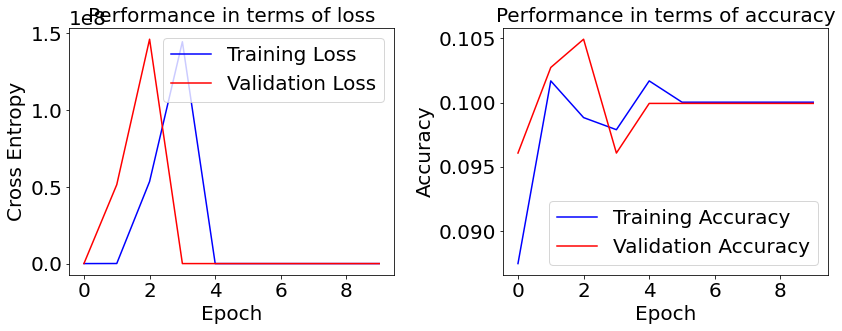

In [24]:
import pandas as pd

# Create a figure
# pd.DataFrame(history.history).plot(figsize=(8, 5))
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
hist = history.history
axes[0].plot(hist['loss'], '-b', label='Training Loss')
axes[0].plot(hist['val_loss'], '-r', label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Cross Entropy')
axes[0].set_title('Performance in terms of loss')
axes[0].legend()

axes[1].plot(hist['accuracy'], '-b', label='Training Accuracy')
axes[1].plot(hist['val_accuracy'], '-r', label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Performance in terms of accuracy')
axes[1].legend()

plt.tight_layout()
plt.savefig(abspath_curr + 'result/figure/learning_curve_without_callback_10.pdf')
plt.show()

# Training (With ModelCheckpoint callback to Save the Model)

## Creating the directory for the saved model

In [25]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the model

In [26]:
# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

# Add two hidden layers
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))

# Add the output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# The model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 50)                153650    
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 156,710
Trainable params: 156,710
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [27]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

### Setting callbacks

In [30]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + 'result/model/model.h5',
                                                      save_weights_only=True)

### Training, evaluating and saving the model

In [29]:
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb])

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 195.2127 - accuracy: 0.1002 - val_loss: 58371.4648 - val_accuracy: 0.0995
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 58282.3086 - accuracy: 0.1002 - val_loss: 858254464.0000 - val_accuracy: 0.0961
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 861582848.0000 - accuracy: 0.1017 - val_loss: 2610820.0000 - val_accuracy: 0.1027
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 2726285.5000 - accuracy: 0.0988 - val_loss: 38145372.0000 - val_accuracy: 0.1027
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 39772156.0000 - accuracy: 0.0988 - val_loss: 2.6920 - val_accuracy: 0.0961
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 2.6649 - accuracy: 0.1017 - val_loss: 2.3954 - val_accuracy: 0.1013
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 2.3796 - accuracy: 0.0994 - val_loss: 2.3441 - val_accura

## Loading the saved model

In [30]:
# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

# Add two hidden layers
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))

# Add the output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# The model summary
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Load the saved model
model.load_weights(filepath=abspath_curr + 'result/model/model.h5')

In [32]:
model.evaluate(data_valid)

1/1 [==============================] - 1s 646ms/step - loss: 2.3158 - accuracy: 0.1013


[2.315795660018921, 0.10133333504199982]

# Training (With ModelCheckpoint callback to Save the Best Model)

# Training

In [33]:
# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

# Add two hidden layers
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))

# Add the output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# The model summary
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + 'result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)
history = model.fit(data_train,
                    epochs=20,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb])

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 176.0899 - accuracy: 0.1003 - val_loss: 67232.1406 - val_accuracy: 0.0999
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 67768.6875 - accuracy: 0.1000 - val_loss: 119600288.0000 - val_accuracy: 0.0961
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 120259072.0000 - accuracy: 0.1017 - val_loss: 25585.7305 - val_accuracy: 0.1027
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 25951.4141 - accuracy: 0.0988 - val_loss: 2.4123 - val_accuracy: 0.1049
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 3.2065 - accuracy: 0.0979 - val_loss: 2.3240 - val_accuracy: 0.1049
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 2.3286 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.1049
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 2.3026 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1049
Epoch 8

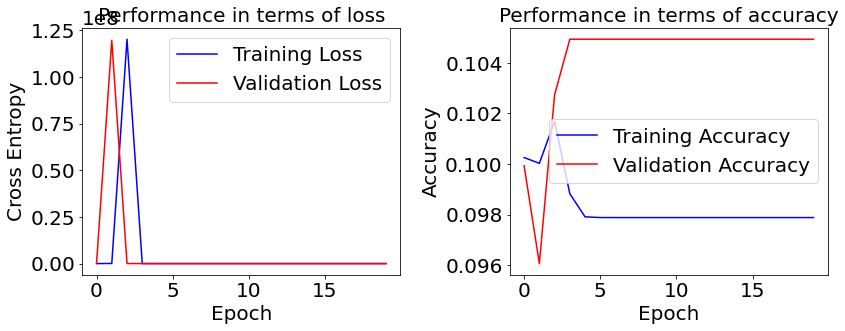

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
hist = history.history
axes[0].plot(hist['loss'], '-b', label='Training Loss')
axes[0].plot(hist['val_loss'], '-r', label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Cross Entropy')
axes[0].set_title('Performance in terms of loss')
axes[0].legend()

axes[1].plot(hist['accuracy'], '-b', label='Training Accuracy')
axes[1].plot(hist['val_accuracy'], '-r', label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Performance in terms of accuracy')
axes[1].legend()

plt.tight_layout()
plt.savefig(abspath_curr + 'result/figure/learning_curve_without_callback_10.pdf')
plt.show()

# Training (With ModelCheckpoint and EarlyStopping)

## Building the model

In [35]:
# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

# Add two hidden layers
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))

# Add the output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# The model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 50)                153650    
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
Total params: 156,710
Trainable params: 156,710
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [36]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

### Setting callbacks

In [54]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + 'result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True,
                                                  verbose=1)

### Training, evaluating and saving the best model

In [38]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=20,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb, early_stopping_cb])

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 137.3422 - accuracy: 0.1038 - val_loss: 42023.3047 - val_accuracy: 0.0961
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 40607.7695 - accuracy: 0.1017 - val_loss: 88580328.0000 - val_accuracy: 0.1027
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 92156392.0000 - accuracy: 0.0988 - val_loss: 10407.6436 - val_accuracy: 0.0773
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 11104.8135 - accuracy: 0.0779 - val_loss: 874.2431 - val_accuracy: 0.1022
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 1101.5089 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoc

## Plotting the learning curve

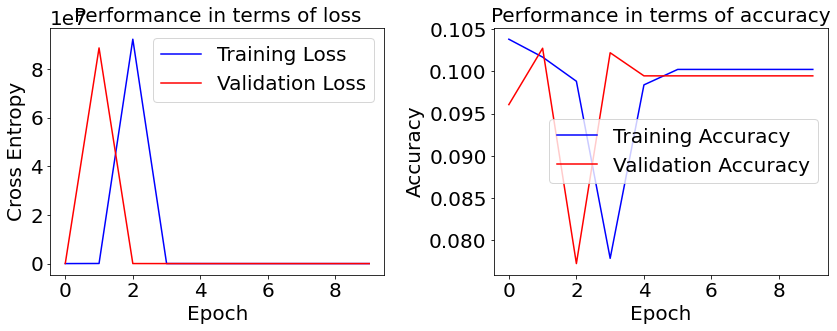

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
hist = history.history
axes[0].plot(hist['loss'], '-b', label='Training Loss')
axes[0].plot(hist['val_loss'], '-r', label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Cross Entropy')
axes[0].set_title('Performance in terms of loss')
axes[0].legend()

axes[1].plot(hist['accuracy'], '-b', label='Training Accuracy')
axes[1].plot(hist['val_accuracy'], '-r', label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Performance in terms of accuracy')
axes[1].legend()

plt.tight_layout()
plt.savefig(abspath_curr + 'result/figure/learning_curve_without_callback_10.pdf')
plt.show()

# Experiment

In [22]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + 'data/',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + 'data/',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + 'data/',
                      as_supervised=True)

## Shuffling, batching and prefetching the data

In [23]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
batch_size = 100

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

In [24]:
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

In [55]:
model1_config = [InputLayer(input_shape=[32,32,3], batch_size=None),
                 Conv2D(filters=16, kernel_size=5, 
                        activation='relu', padding='valid'), # 28 x 28
                 MaxPool2D(), # 14x14
                 Conv2D(filters=32, kernel_size=3, 
                        activation='relu', padding='valid'), # 12x12
                 MaxPool2D(), # 6x6
                 Conv2D(filters=10, kernel_size=6,
                        activation='softmax', padding='valid'),
                 Reshape([10])]

model1 = Sequential(model1_config)

In [56]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        1216      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 1, 10)          11530     
                                                                 
 reshape_4 (Reshape)         (None, 10)               

In [57]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
terminate_on_nan = tf.keras.callbacks.TerminateOnNaN()

In [59]:
history1 = model1.fit(data_train,
                      epochs=1000,
                      validation_data=data_valid,
                      callbacks=[model_checkpoint_cb, 
                                 early_stopping_cb,
                                 terminate_on_nan])

Epoch 1/1000
350/350 [==============================] - 6s 15ms/step - loss: 14.4908 - accuracy: 0.1009 - val_loss: 14.5374 - val_accuracy: 0.0981
Epoch 2/1000
350/350 [==============================] - 5s 15ms/step - loss: 14.4937 - accuracy: 0.1008 - val_loss: 14.5369 - val_accuracy: 0.0981
Epoch 3/1000
350/350 [==============================] - 6s 16ms/step - loss: 9.2980 - accuracy: 0.1157 - val_loss: 2.3135 - val_accuracy: 0.1414
Epoch 4/1000
350/350 [==============================] - 6s 16ms/step - loss: 2.1648 - accuracy: 0.2324 - val_loss: 1.9640 - val_accuracy: 0.2923
Epoch 5/1000
350/350 [==============================] - 5s 15ms/step - loss: 1.9840 - accuracy: 0.3117 - val_loss: 2.1465 - val_accuracy: 0.2455
Epoch 6/1000
350/350 [==============================] - 6s 16ms/step - loss: 1.8702 - accuracy: 0.3438 - val_loss: 1.8215 - val_accuracy: 0.3489
Epoch 7/1000
350/350 [==============================] - 6s 16ms/step - loss: 1.7680 - accuracy: 0.3804 - val_loss: 1.9693 - va

## Model2 with more non-linear layers

In [81]:
model2_config = [InputLayer(input_shape=[32,32,3], batch_size=None),
                 Conv2D(filters=16, kernel_size=5, 
                        activation='relu', padding='valid'), # 28 x 28
                 Conv2D(filters=16, kernel_size=3, 
                        activation='relu', padding='valid'), # 26 x 26
                 MaxPool2D(), # 13x13
                 Conv2D(filters=32, kernel_size=3, 
                        activation='relu', padding='valid'), # 11x11
                 Conv2D(filters=32, kernel_size=3, 
                        activation='relu', padding='valid'), # 9x9
                 MaxPool2D(), # 4x4
                 Conv2D(filters=10, kernel_size=4,
                        activation='softmax', padding='valid'),
                 Reshape([10])]

model2 = Sequential(model2_config)
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 16)        1216      
                                                                 
 conv2d_46 (Conv2D)          (None, 26, 26, 16)        2320      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 conv2d_48 (Conv2D)          (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                

In [82]:
early_stopping_cb = keras.callbacks.EarlyStopping( monitor='val_loss',
                                                    min_delta=1e-3,
                                                    patience=10,
                                                    verbose=1,
                                                    mode='min',
                                                    restore_best_weights=True
                                                )

In [83]:
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(
                                                    monitor='val_loss',
                                                    factor=0.1,
                                                    patience=10,
                                                    verbose=0,
                                                    mode='min',
                                                    min_lr=1e-3
                                                   )


In [84]:
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(data_train,
                      epochs=1000,
                      validation_data=data_valid,
                      callbacks=[model_checkpoint_cb, 
                                 early_stopping_cb,
                                 terminate_on_nan,
                                 reduce_lr_cb
                                ])

Epoch 1/1000
350/350 [==============================] - 6s 16ms/step - loss: 2.2725 - accuracy: 0.3025 - val_loss: 1.7991 - val_accuracy: 0.3415 - lr: 0.0010
Epoch 2/1000
350/350 [==============================] - 6s 17ms/step - loss: 1.6184 - accuracy: 0.4226 - val_loss: 1.5172 - val_accuracy: 0.4550 - lr: 0.0010
Epoch 3/1000
350/350 [==============================] - 6s 16ms/step - loss: 1.4777 - accuracy: 0.4804 - val_loss: 1.4597 - val_accuracy: 0.4827 - lr: 0.0010
Epoch 4/1000
350/350 [==============================] - 6s 16ms/step - loss: 1.3815 - accuracy: 0.5166 - val_loss: 1.3786 - val_accuracy: 0.5091 - lr: 0.0010
Epoch 5/1000
350/350 [==============================] - 6s 16ms/step - loss: 1.3137 - accuracy: 0.5427 - val_loss: 1.4526 - val_accuracy: 0.5004 - lr: 0.0010
Epoch 6/1000
350/350 [==============================] - 6s 16ms/step - loss: 1.2551 - accuracy: 0.5632 - val_loss: 1.4619 - val_accuracy: 0.5094 - lr: 0.0010
Epoch 7/1000
350/350 [==============================

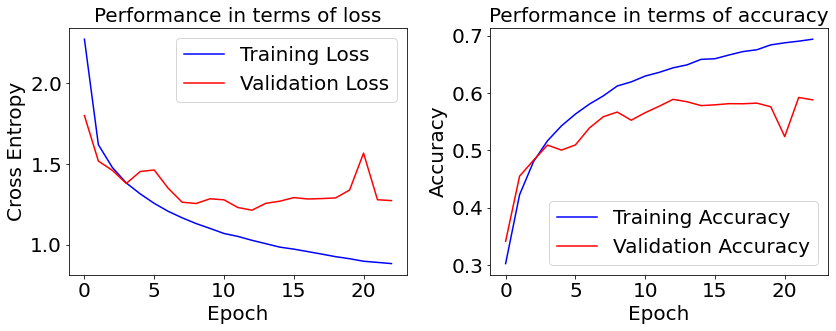

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
hist = history2.history
axes[0].plot(hist['loss'], '-b', label='Training Loss')
axes[0].plot(hist['val_loss'], '-r', label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Cross Entropy')
axes[0].set_title('Performance in terms of loss')
axes[0].legend()

axes[1].plot(hist['accuracy'], '-b', label='Training Accuracy')
axes[1].plot(hist['val_accuracy'], '-r', label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Performance in terms of accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

## With Batch Normalization

In [86]:
model3_config = [InputLayer(input_shape=[32,32,3], batch_size=None),
                 Conv2D(filters=16, kernel_size=5, 
                        activation='relu', padding='valid'), # 28 x 28
                 BatchNormalization(),
                 Conv2D(filters=16, kernel_size=3, 
                        activation='relu', padding='valid'), # 26 x 26
                 MaxPool2D(), # 13x13
                 BatchNormalization(),
                 Conv2D(filters=32, kernel_size=3, 
                        activation='relu', padding='valid'), # 11x11
                 BatchNormalization(),
                 Conv2D(filters=32, kernel_size=3, 
                        activation='relu', padding='valid'), # 9x9
                 MaxPool2D(), # 4x4
                 BatchNormalization(),
                 Conv2D(filters=10, kernel_size=4,
                        activation='softmax', padding='valid'),
                 Reshape([10])]

model3 = Sequential(model3_config)
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 16)        1216      
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_51 (Conv2D)          (None, 26, 26, 16)        2320      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 13, 13, 16)       64        
 hNormalization)                                                 
                                                     

In [87]:
model3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(data_train,
                      epochs=1000,
                      validation_data=data_valid,
                      callbacks=[model_checkpoint_cb, 
                                 early_stopping_cb,
                                 terminate_on_nan])

Epoch 1/1000
350/350 [==============================] - 8s 21ms/step - loss: 1.5806 - accuracy: 0.4286 - val_loss: 1.4130 - val_accuracy: 0.4989
Epoch 2/1000
350/350 [==============================] - 7s 20ms/step - loss: 1.2452 - accuracy: 0.5574 - val_loss: 1.3499 - val_accuracy: 0.5232
Epoch 3/1000
350/350 [==============================] - 7s 21ms/step - loss: 1.0955 - accuracy: 0.6119 - val_loss: 1.1347 - val_accuracy: 0.6050
Epoch 4/1000
350/350 [==============================] - 7s 20ms/step - loss: 0.9996 - accuracy: 0.6491 - val_loss: 1.1042 - val_accuracy: 0.6137
Epoch 5/1000
350/350 [==============================] - 7s 21ms/step - loss: 0.9338 - accuracy: 0.6719 - val_loss: 1.2516 - val_accuracy: 0.5803
Epoch 6/1000
350/350 [==============================] - 7s 20ms/step - loss: 0.8846 - accuracy: 0.6914 - val_loss: 1.0964 - val_accuracy: 0.6249
Epoch 7/1000
350/350 [==============================] - 7s 20ms/step - loss: 0.8429 - accuracy: 0.7064 - val_loss: 1.0220 - val_ac

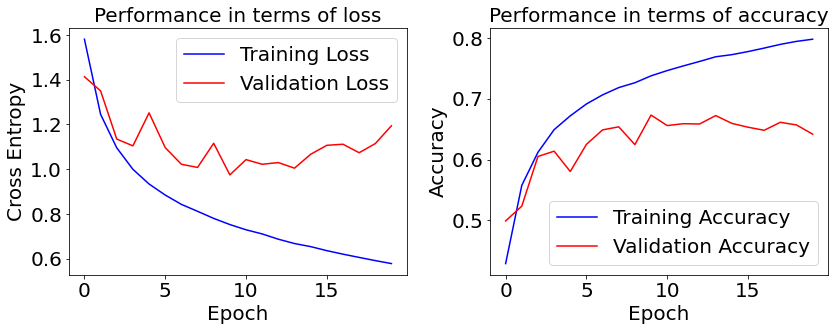

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
hist = history3.history
axes[0].plot(hist['loss'], '-b', label='Training Loss')
axes[0].plot(hist['val_loss'], '-r', label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Cross Entropy')
axes[0].set_title('Performance in terms of loss')
axes[0].legend()

axes[1].plot(hist['accuracy'], '-b', label='Training Accuracy')
axes[1].plot(hist['val_accuracy'], '-r', label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Performance in terms of accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

# Testing the Best Model

In [90]:
model3.evaluate(data_valid)

150/150 [==============================] - 1s 8ms/step - loss: 0.9747 - accuracy: 0.6732


[0.9746625423431396, 0.6732000112533569]

In [91]:
model3.evaluate(data_test)

100/100 [==============================] - 1s 12ms/step - loss: 0.9550 - accuracy: 0.6765


[0.955049991607666, 0.6765000224113464]